# ПОЯСНЕННЯ ЩОДО ВИКОНАННЯ

Як було обговорено на практичному занняті, працювати на лімітованому GPU дуже важко. Це завдання робив тиждень, майже не відходячи від тренування моделі, бо після закінчення GPU, проводив налаштування на CPU.

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))



2.2.0+cu121
True
Tesla T4


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"crossfil","key":"fc987fb42b575d745b04d3d86099793f"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c deep-learning-for-computer-vision-and-nlp-2025-02


 99% 989M/997M [00:13<00:00, 87.3MB/s]
100% 997M/997M [00:13<00:00, 76.6MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('deep-learning-for-computer-vision-and-nlp-2025-02.zip', 'r') as zip_ref:
    zip_ref.extractall('data')


Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6431 entries, 0 to 6430
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PetID          6431 non-null   object
 1   Description    6426 non-null   object
 2   AdoptionSpeed  6431 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 150.9+ KB
None

Train DataFrame Head:
       PetID                                        Description  AdoptionSpeed
0  d3b4f29f8  Mayleen and Flo are two lovely adorable sister...              2
1  e9dc82251  A total of 5 beautiful Tabbys available for ad...              2
2  8111f6d4a  Two-and-a-half month old girl. Very manja and ...              2
3  693a90fda  Neil is a healthy and active ~2-month-old fema...              2
4  9d08c85ef  Gray kitten available for adoption in sungai p...              2

Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data co

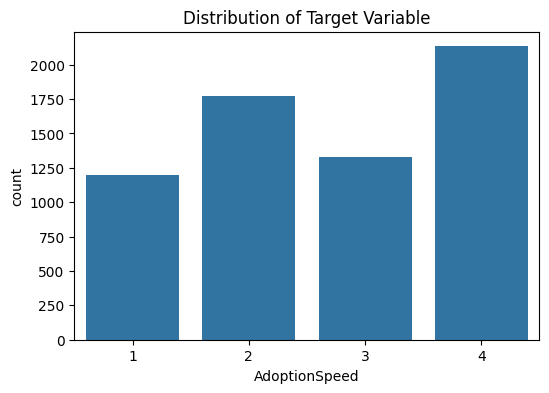

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження
DATA_DIR = 'data'
train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))

# Перевірка структури даних
print("Train DataFrame Info:")
print(train_df.info())
print("\nTrain DataFrame Head:")
print(train_df.head())

print("\nTest DataFrame Info:")
print(test_df.info())
print("\nTest DataFrame Head:")
print(test_df.head())

# Перевірка наявності пропущених значень
print("\nMissing values in train set:")
print(train_df.isnull().sum())

# Розподіл цільової змінної (для аналізу балансу класів)
plt.figure(figsize=(6, 4))
sns.countplot(x='AdoptionSpeed', data=train_df)
plt.title('Distribution of Target Variable')
plt.show()


In [ ]:
!pip install torch==2.2.2+cu121 torchvision==0.17.2+cu121 torchaudio==2.2.2+cu121 --index-url https://download.pytorch.org/whl/cu121 --force-reinstall
# GPU

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.3/757.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2

In [ ]:
!pip install torchtext==0.17.0 --use-deprecated=legacy-resolver --force-reinstall
# GPU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 822.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 111.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install numpy==1.25.2
# GPU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.17.2+cu121 requires torch==2.2.2, but you have torch 2.2.0 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from transformers import BertModel

class PetAdoptionModel(nn.Module):
    def __init__(self, num_classes=4, bert_model_name='bert-base-uncased'):
        super(PetAdoptionModel, self).__init__()

        # ResNet50 для зображень
        resnet = models.resnet50(pretrained=True)
        resnet.fc = nn.Identity()  # Видаляємо останній шар
        self.resnet = resnet
        self.image_fc = nn.Linear(2048, 128)  # Приводимо розмірність ознак зображення до 128

        # BERT для тексту
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.text_feature_dim = self.bert.config.hidden_size
        # Зменшуємо розмірність текстових ознак до 128
        self.text_fc = nn.Linear(self.text_feature_dim, 128)

        # Фінальний класифікатор: об'єднання ознак з зображення та тексту
        self.classifier = nn.Linear(128 + 128, num_classes)

    def forward(self, images, input_ids, attention_mask):
        # Обробка зображень через ResNet
        # Обмежуємо кількість фото до максимум 5
        if images.dim() == 5:  # Перевіряємо, чи вхід має форму [batch_size, num_images, C, H, W]
           images = images[:, :5]  # Беремо максимум 5 фото
           batch_size, num_images, C, H, W = images.size()
           images = images.view(batch_size * num_images, C, H, W)  # Перетворюємо для ResNet

           # Пропускаємо через ResNet
           image_features = self.resnet(images)  # [batch_size * num_images, 2048]
           image_features = image_features.view(batch_size, num_images, -1)  # [batch_size, num_images, 2048]

            # Усереднюємо ознаки по фото
           image_features = torch.mean(image_features, dim=1)  # [batch_size, 2048]
        else:
           image_features = self.resnet(images)


        # Обробка тексту через BERT
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        # Використовуємо вектор [CLS] як представлення тексту
        text_features = bert_output.last_hidden_state[:, 0, :]  # [batch_size, hidden_size]
        text_features = self.text_fc(text_features)             # [batch_size, 128]

        # Об'єднання ознак
        combined = torch.cat((image_features, text_features), dim=1)  # [batch_size, 256]

        # Фінальний прогноз
        output = self.classifier(combined)                        # [batch_size, num_classes]
        return output

# Ініціалізація моделі
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PetAdoptionModel(num_classes=4).to(device)

# Вибір оптимізатора та функції втрат
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Вивід архітектури моделі
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 170MB/s]
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, 

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

PetAdoptionModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [ ]:
import os
import re
import random
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

# ------------------------- Параметри -------------------------
MAX_TEXT_LENGTH = 100
BATCH_SIZE = 32

# ------------------------- Завантаження даних -------------------------
data_dir = '/content/data/'
train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_dir, 'test.csv'))

# ------------------------- Попередня обробка тексту -------------------------
def clean_text(text):
    if pd.isna(text) or text == "":
        return "No description available"
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Видалити пунктуацію
    text = re.sub(r"\s+", " ", text).strip()    # Видалити зайві пробіли
    return text


train_df['Description'] = train_df['Description'].apply(clean_text)
test_df['Description'] = test_df['Description'].apply(clean_text)

# ------------------------- Ініціалізація BERT-токенізатора -------------------------
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_text(text, max_length=MAX_TEXT_LENGTH):
    encoding = bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoding['input_ids'][0], encoding['attention_mask'][0]


# Попереднє токенізування текстів для тренувального і тестового наборів
train_text_data = [tokenize_text(text) for text in train_df['Description']]
test_text_data = [tokenize_text(text) for text in test_df['Description']]

# ------------------------- Обробка міток -------------------------
label_encoder = LabelEncoder()
train_df['AdoptionSpeed'] = label_encoder.fit_transform(train_df['AdoptionSpeed'])

# ------------------------- Побудова мапи зображень -------------------------
image_map = {}
image_dir = os.path.join(data_dir, 'images', 'images')

for folder in ['train', 'test']:
    folder_path = os.path.join(image_dir, folder)
    if os.path.exists(folder_path):
        for filename in os.listdir(folder_path):
            if '-' in filename:  # Check if filename has a hyphen
                pet_id = filename.split('-')[0]
                # Додаємо всі зображення для одного PetID (до 5 штук)
                if pet_id not in image_map:
                    image_map[pet_id] = []
                if len(image_map[pet_id]) < 5:
                    image_map[pet_id].append(os.path.join(folder_path, filename))
            else:
                print(f"Skipping file with invalid format: {filename}")


# ------------------------- Трансформації для зображень -------------------------
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ------------------------- Створення Dataset -------------------------
class PetDataset(Dataset):
    def __init__(self, dataframe, text_data, image_dir=None, transform=None, is_train=True):
        self.dataframe = dataframe
        self.text_data = text_data
        self.is_train = is_train
        self.transform = transform
        self.image_dir = image_dir

        self.valid_indices = []
        for idx, row in dataframe.iterrows():
            pet_id = row['PetID']
            if pet_id in image_map and image_map[pet_id]:
                self.valid_indices.append(idx)
            else:
                print(f"Warning: No image found for PetID {pet_id}, skipping this data point.")


    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        real_idx = self.valid_indices[idx]
        row = self.dataframe.iloc[real_idx]
        pet_id = row['PetID']

        if self.image_dir:
            image_paths = []
            # Шукаємо всі зображення для поточного PetID
            for subfolder in ['train', 'test']:
                for filename in image_map.get(pet_id, []):
                    image_paths.append(filename)

            if not image_paths:
                print(f"No image found for PetID {pet_id}, skipping")
                return None

            try:
                # Завантажуємо зображення
                image = Image.open(image_paths[0]).convert('RGB')
                if self.transform:
                    image = self.transform(image)
            except Exception as e:
                print(f"Error loading image {image_paths[0]}: {e}, skipping")
                return None

            # Перевіряємо текстові дані
            text = self.dataframe.iloc[real_idx]['Description']
            if pd.isna(text) or text == "":
                print(f"Missing or empty text for PetID {pet_id}, skipping")
                return None

            input_ids, attention_mask = tokenize_text(text)

            label = torch.tensor(row['AdoptionSpeed'], dtype=torch.long) if self.is_train else -1

            return image, input_ids, attention_mask, label

        return None


# ------------------------- Функція для фільтрації None -------------------------
def custom_collate(batch):
    batch = [data for data in batch if data is not None]
    if len(batch) == 0:
        return None
    images, input_ids_list, attention_mask_list, labels = zip(*batch)
    images = torch.stack(images)
    input_ids = torch.stack(input_ids_list)
    attention_mask = torch.stack(attention_mask_list)
    labels = torch.tensor(labels, dtype=torch.long)
    return images, input_ids, attention_mask, labels

# ------------------------- Розділення на тренувальний та валідаційний набори -------------------------
train_df, valid_df, train_text_data, valid_text_data = train_test_split(
    train_df, train_text_data, test_size=0.2, random_state=42, stratify=train_df['AdoptionSpeed']
)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

# ------------------------- Створення тренувального та валідаційного датасетів -------------------------
train_dataset = PetDataset(train_df, train_text_data, image_dir=image_dir, is_train=True, transform=image_transforms)
valid_dataset = PetDataset(valid_df, valid_text_data, image_dir=image_dir, is_train=True, transform=image_transforms)

# ------------------------- DataLoader -------------------------
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=custom_collate)

# ------------------------- Перевірка DataLoader -------------------------
for batch in train_loader:
    if batch is None:
        print("Empty batch — skipping")
        continue
    images, input_ids, attention_mask, labels = batch
    print("Shape of images:", images.shape)             # [batch_size, 3, 224, 224]
    print("Shape of input_ids:", input_ids.shape)       # [batch_size, MAX_TEXT_LENGTH]
    print("Shape of attention_mask:", attention_mask.shape)  # [batch_size, MAX_TEXT_LENGTH]
    print("Shape of labels:", labels.shape)             # [batch_size]
    break


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Shape of images: torch.Size([32, 3, 224, 224])
Shape of input_ids: torch.Size([32, 100])
Shape of attention_mask: torch.Size([32, 100])
Shape of labels: torch.Size([32])


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from transformers import BertModel, BertConfig

class PetAdoptionModel(nn.Module):
    def __init__(self, num_classes, bert_model_name='bert-base-uncased', hidden_size=768, num_attention_heads=8, num_hidden_layers=6):
        super(PetAdoptionModel, self).__init__()

        # ResNet50 для зображень
        resnet = models.resnet50(pretrained=True)
        resnet.fc = nn.Identity()  # Видаляємо останній шар
        self.resnet = resnet
        self.image_feature_dim = 2048

        # Приводимо ознаки зображення до 128 вимірів
        self.image_fc = nn.Linear(self.image_feature_dim, 128)

        # BERT для тексту
        bert_config = BertConfig.from_pretrained(
            bert_model_name,
            hidden_size=hidden_size,
            num_attention_heads=num_attention_heads,
            num_hidden_layers=num_hidden_layers
        )
        self.bert = BertModel.from_pretrained(bert_model_name, config=bert_config)
        self.text_feature_dim = hidden_size

        # Додатковий нелінійний шар для об'єднання ознак
        combined_input_dim = 128 + self.text_feature_dim
        self.combined_layer = nn.Sequential(
            nn.Linear(combined_input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.6)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.6),
            nn.Linear(256, num_classes)
        )

    def forward(self, images, input_ids, attention_mask):
        # Обробка зображень через ResNet
        image_features = self.resnet(images)            # [batch_size, 2048]
        image_features = self.image_fc(image_features)    # [batch_size, 128]

        # Обробка тексту через BERT (використовуємо вектор [CLS])
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_features = bert_output.last_hidden_state[:, 0, :]  # [batch_size, hidden_size]

        # Об'єднання ознак
        combined = torch.cat((image_features, text_features), dim=1)  # [batch_size, 128 + hidden_size]
        combined = self.combined_layer(combined)  # [batch_size, 128]

        # Фінальний прогноз
        output = self.classifier(combined)  # [batch_size, num_classes]
        return output

# Приклад ініціалізації моделі:
NUM_CLASSES = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PetAdoptionModel(num_classes=NUM_CLASSES, hidden_size=768).to(device)
print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


PetAdoptionModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

In [ ]:
!pip install scikit-learn

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import cohen_kappa_score
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',
                                       classes=np.unique(train_df['AdoptionSpeed']),
                                       y=train_df['AdoptionSpeed'])

class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# ------------------------- QWK метрика -------------------------
def quadratic_weighted_kappa(y_true, y_pred):
    if len(y_true) == 0 or len(y_pred) == 0:
        return 0.0
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

# ------------------------- EarlyStopping -------------------------
class EarlyStopping:
    def __init__(self, patience=2, delta=0.001, path='best_model.pth'):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, valid_kappa, model):
        score = valid_kappa
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(model)
            self.counter = 0

    def save_checkpoint(self, model):
        torch.save(model.state_dict(), self.path)
        print(f"Validation QWK improved. Saving model to {self.path}")

# ------------------------- Налаштування моделі -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Встановлюємо функцію втрат CrossEntropyLoss
criterion = nn.CrossEntropyLoss(weight=class_weights)
#optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-3)
optimizer = optim.Adam([
    {'params': model.resnet.parameters(), 'weight_decay': 1e-3},
    {'params': model.bert.parameters(), 'weight_decay': 1e-5},
    {'params': model.classifier.parameters(), 'weight_decay': 1e-5}
], lr=1e-4)

early_stopping = EarlyStopping(patience=2, delta=0.001, path='best_model.pth')

# ------------------------- Тренувальний цикл -------------------------
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    all_labels = []
    all_preds = []

    for images, input_ids, attention_mask, labels in train_loader:
        if images is None or input_ids is None or attention_mask is None:
            continue


        images, input_ids, attention_mask, labels = images.to(device), input_ids.to(device), attention_mask.to(device), labels.to(device) # Changed here to include input_ids & attention_mask

        optimizer.zero_grad()
        outputs = model(images, input_ids, attention_mask)


        loss = criterion(outputs, labels)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    # Обчислюємо QWK для тренувального набору
    train_kappa = quadratic_weighted_kappa(all_labels, all_preds)
    avg_train_loss = running_loss / len(train_loader)

    # ------------------------- Валідація -------------------------
    model.eval()
    valid_loss = 0.0
    valid_labels = []
    valid_preds = []

    with torch.no_grad():
        for images, input_ids, attention_mask, labels in valid_loader:
            if images is None or input_ids is None or attention_mask is None or labels is None:
                continue

            images, input_ids, attention_mask, labels = images.to(device), input_ids.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(images, input_ids, attention_mask)

            loss = criterion(outputs, labels)
            valid_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            valid_labels.extend(labels.cpu().numpy())
            valid_preds.extend(preds.cpu().numpy())


            # Обчислюємо QWK для валідаційного набору
            valid_kappa = quadratic_weighted_kappa(valid_labels, valid_preds)
            avg_valid_loss = valid_loss / len(valid_loader)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train QWK: {train_kappa:.4f}, "
          f"Validation Loss: {avg_valid_loss:.4f}, Validation QWK: {valid_kappa:.4f}")

    # ------------------------- Early Stopping -------------------------
    early_stopping(valid_kappa, model)
    if early_stopping.early_stop:
        print("Early stopping triggered!")
        break


Missing or empty text for PetID fac19639c, skipping
Missing or empty text for PetID 49a832741, skipping
Missing or empty text for PetID 480f33a74, skipping
Missing or empty text for PetID 0b3b23c20, skipping
Missing or empty text for PetID 16504b328, skipping
Missing or empty text for PetID ca659fd81, skipping
Missing or empty text for PetID 937c2e14f, skipping
Missing or empty text for PetID b5ff2b987, skipping
Missing or empty text for PetID 983160271, skipping
Epoch [1/10], Train Loss: 1.3721, Train QWK: 0.1376, Validation Loss: 1.3492, Validation QWK: 0.2731
Validation QWK improved. Saving model to best_model.pth
Missing or empty text for PetID 937c2e14f, skipping
Missing or empty text for PetID 480f33a74, skipping
Missing or empty text for PetID ca659fd81, skipping
Missing or empty text for PetID 0b3b23c20, skipping
Missing or empty text for PetID b5ff2b987, skipping
Missing or empty text for PetID fac19639c, skipping
Missing or empty text for PetID 49a832741, skipping
Missing or 

In [ ]:
!pip install optuna --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.6 MB/s eta 0:00:00


In [ ]:
# optuna робив на попередніх версіях, значного покращення не дало, але після неї закінчувалась сесія colab

# import optuna
# import torch.optim as optim
# from torch.utils.data import DataLoader
# from sklearn.metrics import cohen_kappa_score

# # ------------------------- Оптимізація з Optuna -------------------------
# def objective(trial):
#     # Підбір параметрів для BERT і загальної архітектури
#     learning_rate = trial.suggest_float('lr', 5e-5, 5e-4, log=True)
#     batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
#     weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-3, log=True)

#     # Fix hidden_size to 768 to match 'bert-base-uncased'
#     hidden_size = 768
#     # hidden_size = trial.suggest_int('hidden_size', 256, 512, step=64)  # Оптимальний розмір шару

#     # ------------------------- Ініціалізація моделі -------------------------
#     model = PetAdoptionModel(
#         hidden_size=hidden_size,
#         num_attention_heads=8,  # Фіксоване значення для спрощення пошуку
#         num_hidden_layers=6,    # Фіксоване значення для стабільності
#         num_classes=NUM_CLASSES
#     ).to(device)

#     optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
#     criterion = torch.nn.CrossEntropyLoss()
#     early_stopping = EarlyStopping(patience=3, delta=0.001, path='best_model.pth')

#     # ------------------------- DataLoader -------------------------
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

#     # ------------------------- Тренування (5 епох для кращого підбору) -------------------------
#     num_epochs = 5
#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         all_labels = []
#         all_preds = []

#         for batch in train_loader:
#             if batch is None:
#                 continue
#             images, input_ids, attention_mask, labels = batch
#             images = images.to(device)
#             input_ids = input_ids.to(device)
#             attention_mask = attention_mask.to(device)
#             labels = labels.to(device)

#             optimizer.zero_grad()
#             outputs = model(images, input_ids, attention_mask)

#             loss = criterion(outputs, labels)
#             loss.backward()
#             torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#             optimizer.step()

#             running_loss += loss.item()

#             _, preds = torch.max(outputs, 1)
#             all_labels.extend(labels.cpu().numpy())
#             all_preds.extend(preds.cpu().numpy())

#         train_qwk = cohen_kappa_score(all_labels, all_preds, weights="quadratic")
#         avg_train_loss = running_loss / len(train_loader)

#         # ------------------------- Оцінка на валідації -------------------------
#         model.eval()
#         valid_loss = 0.0
#         valid_labels = []
#         valid_preds = []

#         with torch.no_grad():
#             # Changed here to match valid_loader output
#             for images, input_ids, attention_mask, labels in valid_loader:
#                 if images is None or input_ids is None or attention_mask is None or labels is None:
#                     continue
#                 images = images.to(device)
#                 input_ids = input_ids.to(device)
#                 attention_mask = attention_mask.to(device)
#                 labels = labels.to(device)

#                 outputs = model(images, input_ids, attention_mask)
#                 loss = criterion(outputs, labels)

#                 valid_loss += loss.item()

#                 _, preds = torch.max(outputs, 1)
#                 valid_labels.extend(labels.cpu().numpy())
#                 valid_preds.extend(preds.cpu().numpy())

#         avg_valid_loss = valid_loss / len(valid_loader)
#         valid_qwk = cohen_kappa_score(valid_labels, valid_preds, weights="quadratic")

#         print(f"Epoch {epoch + 1}: "
#               f"Train Loss: {avg_train_loss:.4f}, Train QWK: {train_qwk:.4f}, "
#               f"Valid Loss: {avg_valid_loss:.4f}, Valid QWK: {valid_qwk:.4f}")

#         # ------------------------- EarlyStopping -------------------------
#         early_stopping(valid_qwk, model)
#         if early_stopping.early_stop:
#             print("Early stopping triggered!")
#             break

#         # Передача QWK для Optuna
#         trial.report(valid_qwk, epoch)
#         if trial.should_prune():
#             raise optuna.exceptions.TrialPruned()

#     return valid_qwk

# # ------------------------- Запуск Optuna -------------------------
# study = optuna.create_study(
#     direction="maximize",
#     pruner=optuna.pruners.MedianPruner(n_warmup_steps=2)  # Прискорює пошук
# )
# study.optimize(objective, n_trials=10)

# # ------------------------- Найкращі параметри -------------------------
# best_params = study.best_params
# print("Best params:", best_params)

[I 2025-03-17 19:58:17,030] A new study created in memory with name: no-name-cd26db0d-e2cb-4a6e-bac3-5014e7739434
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1: Train Loss: 1.3663, Train QWK: 0.0805, Valid Loss: 1.3461, Valid QWK: 0.1970
Validation QWK improved. Saving model to best_model.pth
Epoch 2: Train Loss: 1.3259, Train QWK: 0.2256, Valid Loss: 1.3156, Valid QWK: 0.2544
Validation QWK improved. Saving model to best_model.pth
Epoch 3: Train Loss: 1.2970, Train QWK: 0.3188, Valid Loss: 1.3266, Valid QWK: 0.2598
Validation QWK improved. Saving model to best_model.pth
Epoch 4: Train Loss: 1.2705, Train QWK: 0.3635, Valid Loss: 1.3384, Valid QWK: 0.2313
EarlyStopping counter: 1 out of 3
Epoch 5: Train Loss: 1.2475, Train QWK: 0.4155, Valid Loss: 1.2937, Valid QWK: 0.3005


[I 2025-03-17 20:09:58,306] Trial 0 finished with value: 0.30052909056348187 and parameters: {'lr': 8.97994032191994e-05, 'batch_size': 16, 'weight_decay': 7.921736138736728e-05}. Best is trial 0 with value: 0.30052909056348187.


Validation QWK improved. Saving model to best_model.pth


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1: Train Loss: 1.3651, Train QWK: 0.0726, Valid Loss: 1.3086, Valid QWK: 0.2500
Validation QWK improved. Saving model to best_model.pth
Epoch 2: Train Loss: 1.3253, Train QWK: 0.2401, Valid Loss: 1.3038, Valid QWK: 0.2615
Validation QWK improved. Saving model to best_model.pth
Epoch 3: Train Loss: 1.2807, Train QWK: 0.3573, Valid Loss: 1.3320, Valid QWK: 0.2936
Validation QWK improved. Saving model to best_model.pth
Epoch 4: Train Loss: 1.2572, Train QWK: 0.3714, Valid Loss: 1.2910, Valid QWK: 0.3202
Validation QWK improved. Saving model to best_model.pth


[I 2025-03-17 20:20:45,993] Trial 1 finished with value: 0.25971694824223357 and parameters: {'lr': 0.00017971725576653222, 'batch_size': 64, 'weight_decay': 0.0006643018386301126}. Best is trial 0 with value: 0.30052909056348187.


Epoch 5: Train Loss: 1.2135, Train QWK: 0.4339, Valid Loss: 1.3758, Valid QWK: 0.2597
EarlyStopping counter: 1 out of 3


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1: Train Loss: 1.3794, Train QWK: 0.0057, Valid Loss: 1.3640, Valid QWK: 0.0311
Validation QWK improved. Saving model to best_model.pth
Epoch 2: Train Loss: 1.3709, Train QWK: 0.0055, Valid Loss: 1.3668, Valid QWK: -0.0017
EarlyStopping counter: 1 out of 3
Epoch 3: Train Loss: 1.3647, Train QWK: -0.0010, Valid Loss: 1.3589, Valid QWK: 0.0000
EarlyStopping counter: 2 out of 3


[I 2025-03-17 20:29:26,095] Trial 2 finished with value: 0.0 and parameters: {'lr': 0.0004379084183844166, 'batch_size': 32, 'weight_decay': 1.906669100191771e-05}. Best is trial 0 with value: 0.30052909056348187.


Epoch 4: Train Loss: 1.3651, Train QWK: 0.0014, Valid Loss: 1.3605, Valid QWK: 0.0000
EarlyStopping counter: 3 out of 3
Early stopping triggered!


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1: Train Loss: 1.3680, Train QWK: 0.0805, Valid Loss: 1.3457, Valid QWK: 0.2258
Validation QWK improved. Saving model to best_model.pth
Epoch 2: Train Loss: 1.3523, Train QWK: 0.1440, Valid Loss: 1.3208, Valid QWK: 0.2697
Validation QWK improved. Saving model to best_model.pth
Epoch 3: Train Loss: 1.3307, Train QWK: 0.2228, Valid Loss: 1.3165, Valid QWK: 0.2775
Validation QWK improved. Saving model to best_model.pth
Epoch 4: Train Loss: 1.3069, Train QWK: 0.2957, Valid Loss: 1.3053, Valid QWK: 0.2593
EarlyStopping counter: 1 out of 3


[I 2025-03-17 20:40:59,184] Trial 3 finished with value: 0.2594732028033113 and parameters: {'lr': 0.0001217393476712048, 'batch_size': 16, 'weight_decay': 0.00019964326673285778}. Best is trial 0 with value: 0.30052909056348187.


Epoch 5: Train Loss: 1.2892, Train QWK: 0.3183, Valid Loss: 1.3172, Valid QWK: 0.2595
EarlyStopping counter: 2 out of 3


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1: Train Loss: 1.3709, Train QWK: 0.0548, Valid Loss: 1.3989, Valid QWK: 0.1007
Validation QWK improved. Saving model to best_model.pth
Epoch 2: Train Loss: 1.3487, Train QWK: 0.1237, Valid Loss: 1.3441, Valid QWK: 0.1746
Validation QWK improved. Saving model to best_model.pth
Epoch 3: Train Loss: 1.3413, Train QWK: 0.1888, Valid Loss: 1.3306, Valid QWK: 0.1824
Validation QWK improved. Saving model to best_model.pth


In [ ]:
import torch
import torch.optim as optim

# ------------------------- Поєднуємо train + valid у фінальний набір -------------------------
final_dataset = PetDataset(
    train_df,
    train_df['Description'],
    '/content/data/images/images',
    transform=image_transforms
)

# Фільтруємо None із final_dataset (якщо текст або зображення відсутні)
final_dataset = [data for data in final_dataset if data is not None]

if not final_dataset:
    raise ValueError("final_dataset is empty after filtering. Check if all images and texts are valid.")

# Створюємо DataLoader після фільтрації
final_loader = torch.utils.data.DataLoader(
    final_dataset,
    batch_size=16,
    shuffle=True
)

# ------------------------- Ініціалізація моделі -------------------------
hidden_size = 768  # Зафіксований розмір для 'bert-base-uncased'
num_attention_heads = 8  # Залишаємо значення за замовчуванням для спрощення
num_hidden_layers = 6  # Для стабільності вибрано значення по замовчуванню

model = PetAdoptionModel(
    hidden_size=hidden_size,
    num_attention_heads=num_attention_heads,
    num_hidden_layers=num_hidden_layers,
    num_classes=NUM_CLASSES
).to(device)

# Завантажуємо попередньо натреновану модель
model_path = 'best_model.pth'
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    print("Модель завантажена з 'best_model.pth'")
else:
    print(f"Модель не знайдена за шляхом {model_path}. Навчання нової моделі...")

# Використовуємо класові ваги для оптимізації
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# ------------------------- Тренування моделі -------------------------
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    all_labels = []
    all_preds = []

    for batch in final_loader:
        if batch is None:
            continue
        images, input_ids, attention_mask, labels = batch
        images = images.to(device)
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images, input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()

        # Обмеження градієнта для стабільності
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

    # ------------------------- Розрахунок QWK -------------------------
    qwk = quadratic_weighted_kappa(all_labels, all_preds)
    avg_loss = running_loss / len(final_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, QWK: {qwk:.4f}")

    # Очищення пам'яті GPU після кожної епохи
    torch.cuda.empty_cache()

# Зберігаємо модель після тренування
torch.save(model.state_dict(), 'best_model.pth')

print("Модель навчена та збережена!")


Missing or empty text for PetID b5ff2b987, skipping
Missing or empty text for PetID 480f33a74, skipping
Missing or empty text for PetID ca659fd81, skipping
Missing or empty text for PetID 937c2e14f, skipping
Missing or empty text for PetID 0b3b23c20, skipping
Missing or empty text for PetID 16504b328, skipping
Missing or empty text for PetID 49a832741, skipping
Missing or empty text for PetID fac19639c, skipping
Модель завантажена з 'best_model.pth'
Epoch [1/10], Loss: 0.7238, QWK: 0.8344
Epoch [2/10], Loss: 0.6167, QWK: 0.8667
Epoch [3/10], Loss: 0.5267, QWK: 0.8855
Epoch [4/10], Loss: 0.4675, QWK: 0.8922
Epoch [5/10], Loss: 0.4271, QWK: 0.9007
Epoch [6/10], Loss: 0.4258, QWK: 0.8923
Epoch [7/10], Loss: 0.3249, QWK: 0.9212
Epoch [8/10], Loss: 0.2933, QWK: 0.9264
Epoch [9/10], Loss: 0.2656, QWK: 0.9432
Epoch [10/10], Loss: 0.2702, QWK: 0.9296
Модель навчена та збережена!


In [ ]:
# ------------------------- Завантаження тестових даних -------------------------
test_df = pd.read_csv('/content/data/test.csv')

# ------------------------- Токенізація текстів для тесту -------------------------
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

test_encodings = tokenizer(
    test_df['Description'].fillna("").tolist(),
    padding='max_length',
    truncation=True,
    max_length=MAX_TEXT_LENGTH,
    return_tensors='pt'
)

# ------------------------- Створення тестового Dataset -------------------------
test_dataset = PetDataset(
    test_df,
    test_encodings['input_ids'],  # Окремо передаємо input_ids
    image_dir='/content/data/images/images/test',
    transform=image_transforms,  # Додаємо трансформації для зображень
    is_train=False
)

# DataLoader для тестового набору
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=custom_collate
)

# ------------------------- Завантаження попередньо навченої моделі -------------------------
model = PetAdoptionModel(
    hidden_size=hidden_size,
    num_attention_heads=num_attention_heads,
    num_hidden_layers=num_hidden_layers,
    num_classes=NUM_CLASSES
).to(device)

# Завантажуємо збережену модель
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# ------------------------- Передбачення на тестових даних -------------------------
predictions = []

# Перевіримо, чи всі PetID мають зображення та текст
for idx, data in enumerate(test_loader):
    if data is None:
        predictions.append(0)  # Якщо дані відсутні, додаємо найнижчий рейтинг
        continue

    images, input_ids, attention_mask, labels = data
    if images is None or input_ids is None or attention_mask is None:
        predictions.append(0)  # Якщо відсутні зображення або текст, присвоюємо найнижчий рейтинг
        continue

    images = images.to(device)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)

    # Передбачення
    outputs = model(images, input_ids, attention_mask)
    _, predicted_classes = torch.max(outputs, 1)

    predictions.extend(predicted_classes.cpu().numpy())

# Перевірка, чи є передбачення
if len(predictions) != len(test_df):
    # Якщо кількість передбачень менша, ніж кількість записів у тестовому наборі
    print(f"Warning: Expected {len(test_df)} predictions, but got {len(predictions)} predictions.")
    # Заповнюємо пропущені передбачення найнижчим рейтингом
    missing_count = len(test_df) - len(predictions)
    predictions.extend([0] * missing_count)  # Додаємо найнижчий рейтинг (0)

# Формування submission файлу
submission_df = pd.DataFrame({
    'PetID': test_df['PetID'],
    'AdoptionSpeed': predictions
})

# Виведемо, щоб переконатися, що файл збережено
submission_file = '/content/data/submission.csv'

# Збереження файлу
submission_df.to_csv(submission_file, index=False)
print(f"Файл {submission_file} збережено!")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Missing or empty text for PetID ba16888d7, skipping
Файл /content/data/submission.csv збережено!


In [ ]:
# Перевірка для кожного PetID на наявність зображень
missing_images = []
for pet_id in ['95314294', '35992662', '63521459', '81301773']:  # Перелічуємо PetID, для яких були попередження
    image_found = False
    for subfolder in ['train', 'test']:
        image_path = os.path.join(image_dir, subfolder, f'{pet_id}-1.jpg')
        if os.path.exists(image_path):
            image_found = True
            print(f"Зображення знайдено для PetID {pet_id} за шляхом {image_path}")
            break  # Якщо зображення знайдено, не шукаємо більше

    if not image_found:
        missing_images.append(pet_id)
        print(f"Не знайдено зображення для PetID {pet_id}, перевірте шлях {image_path}")

# Перевірка, які PetID мають відсутні зображення
if missing_images:
    print("Перелік PetID без зображень:", missing_images)
else:
    print("Усі зазначені PetID мають зображення.")


Не знайдено зображення для PetID 95314294, перевірте шлях /content/data/images/images/test/95314294-1.jpg
Не знайдено зображення для PetID 35992662, перевірте шлях /content/data/images/images/test/35992662-1.jpg
Не знайдено зображення для PetID 63521459, перевірте шлях /content/data/images/images/test/63521459-1.jpg
Не знайдено зображення для PetID 81301773, перевірте шлях /content/data/images/images/test/81301773-1.jpg
Перелік PetID без зображень: ['95314294', '35992662', '63521459', '81301773']


In [ ]:
from google.colab import files
files.download('/content/data/submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>